# 学習データを整形する
- 自分のパソコンでスクレイピングしているので、たまにデータが取れていない場合があるため、それを除く

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt

In [2]:
li_currency = ["USDJPY","EURUSD","GBPUSD","USDCHF","USDCAD","TRYUSD","AUDUSD","NZDUSD",]
len(li_currency)

8

In [3]:
data_dic_names = ["202103","202104","202105","202106","202107","202108","202109","202110","202111"]

In [ ]:
def columns():
    columns = []
    for i in li_currency:
        column_name = [i + "_" + str(j) for j in range(45)]
        columns += (column_name[:42] + [i + "_price"])
    columns += [i + "_diff" for i in columns]
    return columns
def price_columns():
    columns = []
    for i in li_currency:
        columns += ([i + "_price"])
    columns += [i + "_diff" for i in columns]
    return columns

In [27]:
# 収集したデータの一部を使い、データを作る
for k in data_dic_names:
    data = []
    count = 0
    columns = []
    for i in li_currency:
        column_name = [i + "_" + str(j) for j in range(45)]
        column_name[44] = "date"
        df = pd.read_csv("../datas/gaika_data/" + k + "/"+ i +".csv", names=column_name, header=None)
        df[i + "_price"] = round((df[i + "_" + str(42)] + df[i + "_" + str(43)]) / 2,5)
        columns += (column_name[:42] + [i + "_price"])
        if count == 0:
            data = df
        else:
            data = pd.merge(data,df, on="date", how="inner")
        count += 1
    data[columns].to_csv("../datas/model/" + k + ".csv", index=None)

In [52]:
# データを一つのCSVファイルにする
data = []
count = 0
for name in data_dic_names:
    df = pd.read_csv("../datas/model/" + name + ".csv")
    if count == 0:
        data = df
    else:
        data = pd.concat([data,df])
    count += 1
data.reset_index(inplace=True,drop=True)
data.tail()

,USDJPY_0,USDJPY_1,USDJPY_2,USDJPY_3,USDJPY_4,USDJPY_5,USDJPY_6,USDJPY_7,USDJPY_8,USDJPY_9,...,NZDUSD_33,NZDUSD_34,NZDUSD_35,NZDUSD_36,NZDUSD_37,NZDUSD_38,NZDUSD_39,NZDUSD_40,NZDUSD_41,NZDUSD_price
0,1,2,2,2,1,2,2,1,2,2,...,1,1,1,1,1,1,0,2,0,0.71945
1,1,2,2,2,1,2,2,1,2,2,...,1,1,1,1,1,1,0,2,0,0.71930
2,2,2,2,1,2,2,1,2,2,2,...,1,1,1,1,1,1,0,2,0,0.71970
3,2,2,2,1,2,2,1,2,2,1,...,1,1,1,1,1,1,0,2,0,0.71985
4,2,2,2,1,2,2,1,2,2,1,...,1,1,1,1,1,1,1,0,2,0.72010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30758,1,1,1,2,1,1,1,2,2,2,...,1,0,1,0,1,1,1,1,0,0.71355
30759,1,1,1,2,1,1,1,2,2,2,...,1,0,1,0,1,1,1,1,0,0.71360
30760,1,1,1,2,1,1,1,1,1,1,...,1,0,1,0,1,1,1,1,0,0.71365
30761,1,1,1,1,2,1,1,1,2,2,...,5,1,0,1,0,1,1,1,1,0.71405


In [6]:
# data.to_csv("../datas/model/data.csv", index=None)
columns = columns()
columns_diff = {i: i + "_diff" for i in columns}

In [7]:

data = pd.read_csv("../datas/model/data.csv")
diffs = data.diff(6)
prices = prices()
df_prices = data[prices]
diffs.rename(columns=columns_diff, inplace=True)
data = pd.concat([data,diffs],1)
data = data[~(data.isnull().any(axis=1))]
data.reset_index(inplace=True,drop=True)
data.tail()

,USDJPY_0,USDJPY_1,USDJPY_2,USDJPY_3,USDJPY_4,USDJPY_5,USDJPY_6,USDJPY_7,USDJPY_8,USDJPY_9,...,NZDUSD_33_diff,NZDUSD_34_diff,NZDUSD_35_diff,NZDUSD_36_diff,NZDUSD_37_diff,NZDUSD_38_diff,NZDUSD_39_diff,NZDUSD_40_diff,NZDUSD_41_diff,NZDUSD_price_diff
30752,1,1,1,2,1,1,1,2,2,2,...,0.0,-1.0,1.0,-1.0,1.0,0.0,0.0,0.0,-1.0,-0.00060
30753,1,1,1,2,1,1,1,2,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00105
30754,1,1,1,2,1,1,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00055
30755,1,1,1,1,2,1,1,1,2,2,...,4.0,1.0,-1.0,1.0,-1.0,0.0,0.0,0.0,1.0,0.00055
30756,1,1,1,1,2,1,1,1,2,2,...,4.0,1.0,-1.0,1.0,-1.0,0.0,0.0,0.0,1.0,0.00100


In [16]:
prices = price_columns()
df_prices = data[prices]
target = df_prices.diff(-6)
target_columns = {i: i+"_target" for i in target.keys()}
target.rename(columns=target_columns,inplace=True)
data = pd.concat([data,target],1)
data = data[~(data.isnull().any(axis=1))]
data.tail()

,USDJPY_0,USDJPY_1,USDJPY_2,USDJPY_3,USDJPY_4,USDJPY_5,USDJPY_6,USDJPY_7,USDJPY_8,USDJPY_9,...,AUDUSD_price_target,NZDUSD_price_target,USDJPY_price_diff_target,EURUSD_price_diff_target,GBPUSD_price_diff_target,USDCHF_price_diff_target,USDCAD_price_diff_target,TRYUSD_price_diff_target,AUDUSD_price_diff_target,NZDUSD_price_diff_target
30746,1,1,2,1,1,1,1,2,1,1,...,0.00035,0.00060,-0.065,-0.00040,-0.00065,0.00125,0.00175,-0.0035,-0.00025,-0.00090
30747,1,2,1,1,1,1,2,1,1,1,...,0.00005,-0.00105,-0.140,0.00010,-0.00190,0.00155,0.00175,-0.0130,-0.00065,-0.00365
30748,1,2,1,1,1,1,2,1,2,1,...,-0.00025,-0.00055,-0.105,0.00065,-0.00200,-0.00045,0.00060,-0.0340,-0.00105,-0.00265
30749,1,1,2,1,1,1,1,1,1,2,...,-0.00020,-0.00055,-0.090,0.00105,-0.00135,-0.00050,0.00005,-0.0285,-0.00065,-0.00210
30750,1,1,1,2,1,1,1,1,2,2,...,-0.00025,-0.00100,0.025,0.00035,-0.00100,0.00015,-0.00025,-0.0285,-0.00065,-0.00220


In [18]:
# data.to_csv("../datas/model/data_hour.csv", index=None)

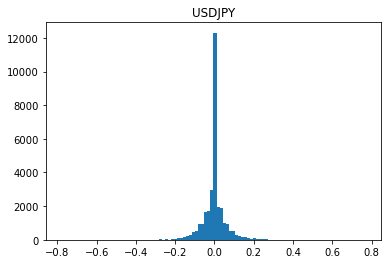

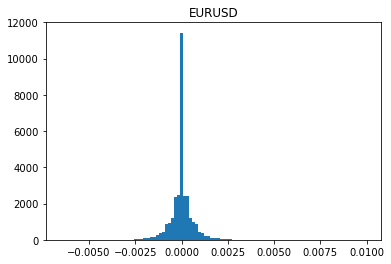

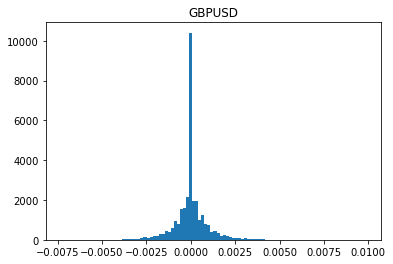

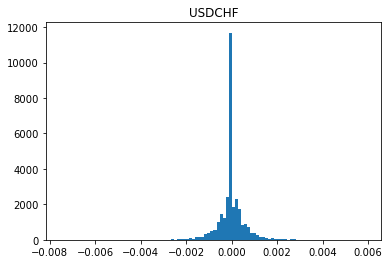

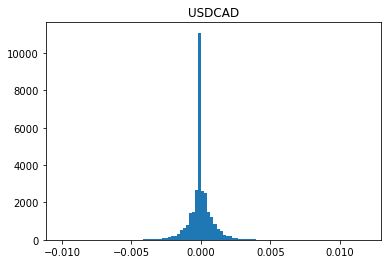

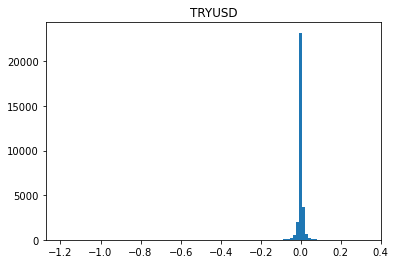

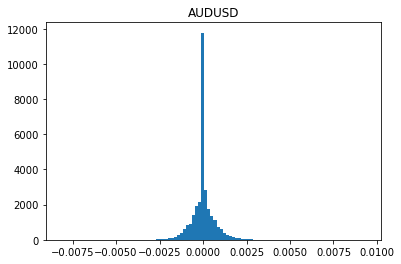

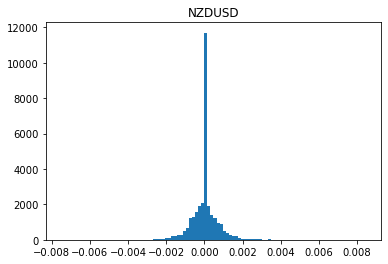

In [17]:
for i in li_currency:
    x = data[i+"_price_target"]
    plt.hist(x,bins=100)
    plt.title(i)
    plt.show()

# データ成型は終了